In [8]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data=pd.read_csv('urldata.csv')
data.head()
data.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'Label'],
      dtype='object')

In [10]:
data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
count,11000.0,11000.000000,11000.000000,11000.000000,11000.000000,11000.0,11000.000000,11000.000000,11000.000000
mean,0.0,0.025091,0.735545,2.714455,0.013455,0.0,0.087000,0.149818,0.500000
std,0.0,0.156408,0.441062,2.149899,0.115216,0.0,0.281848,0.356909,0.500023
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.0,0.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.500000
75%,0.0,0.000000,1.000000,4.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,0.0,1.000000,1.000000,20.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [11]:
new_data = data.drop(['Domain'], axis = 1).copy()
new_data.columns

Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'Label'],
      dtype='object')

In [12]:
new_data.isnull().sum()


Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
Label            0
dtype: int64

In [14]:
#selecting samples from the dataset
new_data = new_data.sample(frac=1).reset_index(drop=True)
new_data

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
0,0,0,1,1,0,0,0,0,1
1,0,0,1,5,0,0,0,0,0
2,0,0,1,2,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1
4,0,0,1,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
10995,0,0,0,0,0,0,0,1,1
10996,0,0,0,2,0,0,0,0,1
10997,0,0,1,7,0,0,1,0,1
10998,0,0,1,2,0,0,0,0,0


In [15]:

# Sepratating & assigning features and target columns to X & y
y = new_data['Label']
X = new_data.drop('Label',axis=1)
X.shape, y.shape

((11000, 8), (11000,))

In [16]:
# Splitting the dataset into train and test sets: 75-25 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, random_state = 12)
X_train.shape, X_test.shape

((8250, 8), (2750, 8))

Machine Learning Models & Training
From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression.

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning model (classification) considered to train the dataset in this notebook is:


Random Forest

In [24]:
#importing packages
from sklearn.metrics import accuracy_score

# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))


In [25]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Performance Evaluation:

In [26]:
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.840
Random forest: Accuracy on test Data: 0.838


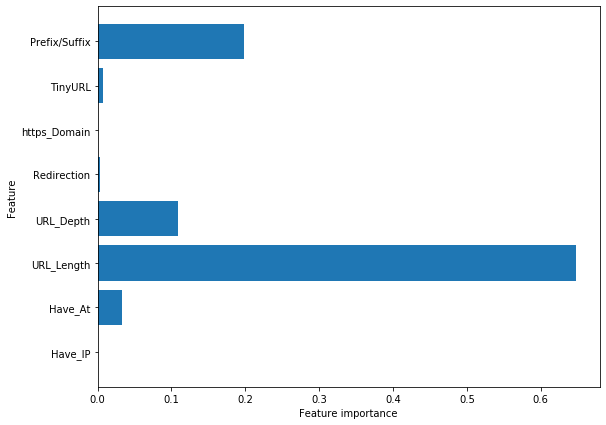

In [27]:
#checking the feature importance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [28]:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [29]:
acc_train_forest, acc_test_forest

(0.8397575757575757, 0.8381818181818181)